In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report  

In [3]:
client=pd.read_csv("bank-full.csv")
client.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
client.head(10)
client.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
client.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
columns = ['age', 'balance', 'duration', 'campaign', 'y']
client1= client[columns]
client1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   balance   45211 non-null  int64 
 2   duration  45211 non-null  int64 
 3   campaign  45211 non-null  int64 
 4   y         45211 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


<AxesSubplot:xlabel='age'>

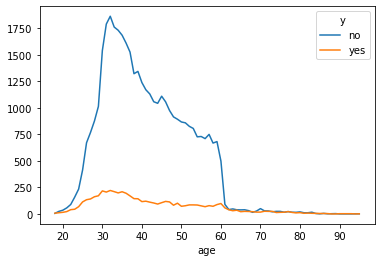

In [8]:
pd.crosstab(client1.age,client1.y).plot(kind="line")

<AxesSubplot:>

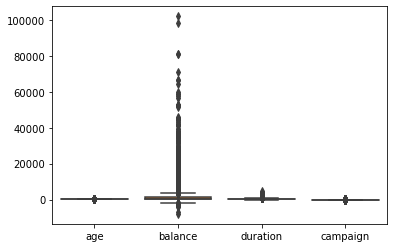

In [10]:
sb.boxplot(data =client1,orient = "v")

In [11]:
client1['outcome'] = client1.y.map({'no':0, 'yes':1})
client1.tail(10)

<ipython-input-11-187fac1a16a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  client1['outcome'] = client1.y.map({'no':0, 'yes':1})


,age,balance,duration,campaign,y,outcome
45201,53,583,226,1,yes,1
45202,34,557,224,1,yes,1
45203,23,113,266,1,yes,1
45204,73,2850,300,1,yes,1
45205,25,505,386,2,yes,1
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0
45210,37,2971,361,2,no,0


<AxesSubplot:title={'center':'age'}, xlabel='outcome'>

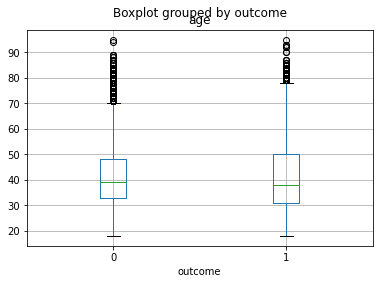

In [12]:
client1.boxplot(column='age', by='outcome')


In [14]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X =client1[feature_col]
Y = client1[output_target]

In [15]:
classifier = LogisticRegression()

In [16]:
classifier.fit(X,Y)

C:\Users\bhavy\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [18]:
classifier.coef_

array([[ 7.69721586e-03,  3.72191063e-05,  3.54908899e-03,
        -1.39828307e-01]])

In [19]:
classifier.predict_proba (X)

array([[0.87367389, 0.12632611],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553763, 0.69446237],
       [0.82336233, 0.17663767],
       [0.86407825, 0.13592175]])

In [20]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

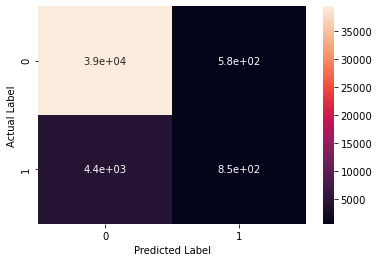

In [36]:
sb.heatmap(confusion_matrix, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [25]:
print (classification_report (Y, y_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score  

0.5734694329116669

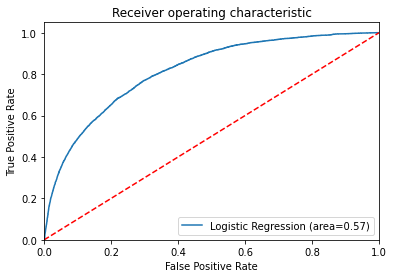

In [27]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [28]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [29]:
y_prob1 

,0
0,0.126326
1,0.075113
2,0.054037
3,0.066483
4,0.080944
...,...
45206,0.555944
45207,0.214680
45208,0.694462
45209,0.176638


In [31]:
import statsmodels.api as sm   

In [32]:
logit = sm.Logit(Y, X)   

In [33]:
logit.fit().summary() 

Optimization terminated successfully.
         Current function value: 0.325947
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45207
Method:                           MLE   Df Model:                            3
Date:                Mon, 06 Sep 2021   Pseudo R-squ.:                 0.09679
Time:                        15:44:07   Log-Likelihood:                -14736.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0581      0.001    -73.443      0.000      -0.060      -0.057
balance     3.673e-05   4.25e-06      8.651      0.000    2.84e-05     4.5e-05
duration       0.0030   5.26e-05     56.719      0.000       0.003       0.003
campaign      -0.2811      0.011    -25.646      0.000      -0.303      -0.260
==============================================================================
"""

In [34]:
fpr 

array([0.00000000e+00, 2.50488452e-05, 2.50488452e-05, ...,
       9.90706878e-01, 9.90706878e-01, 1.00000000e+00])

In [35]:
tpr

array([0.00000000e+00, 0.00000000e+00, 1.89071658e-04, ...,
       9.99810928e-01, 1.00000000e+00, 1.00000000e+00])